<a href="https://colab.research.google.com/github/YashDhruv2004/Transformers-used-for-synthetic-data-generation-/blob/main/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import wasserstein_distance, pearsonr
from sklearn.metrics import mean_squared_error, f1_score
from transformers import pipeline

def load_data(file_path):
    """
    Load tabular data from a CSV file.
    """
    return pd.read_csv(file_path)

def generate_synthetic_data(data, transformer_pipeline):
    """
    Generate synthetic data using GPT-2 for text and Gaussian noise for numbers.
    """
    synthetic_data = []
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    numeric_std_dev = data[numeric_columns].std()

    for row in data.itertuples(index=False, name=None):
        input_text = " ".join(map(str, row))

        # Use GPT-2 only for categorical columns
        generated = transformer_pipeline(input_text, max_new_tokens=3, num_return_sequences=1)[0]['generated_text']
        generated_values = generated.split()[:len(data.columns)]

        cleaned_values = []
        for i, col in enumerate(data.columns):
            if col in numeric_columns:
                try:
                    orig_value = float(row[i])
                    noise = np.random.normal(0, 0.01 * numeric_std_dev[col])  # Reduce noise to 1%
                    cleaned_value = orig_value + noise
                    cleaned_value = np.clip(cleaned_value, data[col].min(), data[col].max())  # Keep in range
                except ValueError:
                    cleaned_value = data[col].mean()  # Fallback to mean
                cleaned_values.append(cleaned_value)
            else:
                cleaned_values.append(generated_values[i] if i < len(generated_values) else "Unknown")

        synthetic_data.append(cleaned_values)

    return pd.DataFrame(synthetic_data, columns=data.columns)

def calculate_metrics(original_data, synthetic_data):
    """
    Compute Mean Squared Error (MSE), Statistical Distance (SD), Distance Measure (DM),
    Proximity (correlation), and F1 Score.
    """
    metrics = {
        "MSE": {},
        "SD (Wasserstein Distance)": {},
        "DM (Euclidean Distance)": {},
        "Proximity (Correlation)": {},
        "F1 Score": {}
    }

    for column in original_data.columns:
        if pd.api.types.is_numeric_dtype(original_data[column]):
            # Mean Squared Error
            metrics["MSE"][column] = mean_squared_error(original_data[column], synthetic_data[column])

            # Statistical Distance (Wasserstein Distance)
            metrics["SD (Wasserstein Distance)"][column] = wasserstein_distance(original_data[column], synthetic_data[column])

            # Distance Measure (Euclidean Distance)
            metrics["DM (Euclidean Distance)"][column] = np.linalg.norm(original_data[column] - synthetic_data[column])

            # Proximity (Pearson Correlation)
            corr, _ = pearsonr(original_data[column], synthetic_data[column])
            metrics["Proximity (Correlation)"][column] = corr

        else:
            # F1 Score for categorical columns
            metrics["F1 Score"][column] = f1_score(original_data[column], synthetic_data[column], average='weighted')

    return metrics

def main(file_path):
    data = load_data(file_path)
    transformer_pipeline = pipeline("text-generation", model="gpt2")

    print("Generating synthetic data...")
    synthetic_data = generate_synthetic_data(data, transformer_pipeline)

    print("Calculating evaluation metrics...")
    metrics = calculate_metrics(data, synthetic_data)

    for metric, values in metrics.items():
        print(f"\n{metric}:")
        for column, value in values.items():
            print(f"{column}: {value}")

if __name__ == "__main__":
    file_path = "/content/screentime_analysis.csv"
    main(file_path)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generating synthetic data...


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Calculating evaluation metrics...

MSE:
Usage (minutes): 0.0749247570681297
Notifications: 0.11868916347822356
Times Opened: 0.060467204676394194

SD (Wasserstein Distance):
Usage (minutes): 0.2239685977412797
Notifications: 0.2594033705127735
Times Opened: 0.1909680220404602

DM (Euclidean Distance):
Usage (minutes): 3.8710400945515846
Notifications: 4.872148673392953
Times Opened: 3.4775624991190073

Proximity (Correlation):
Usage (minutes): 0.999957582763367
Notifications: 0.9999538497836135
Times Opened: 0.9999491067309496

F1 Score:
Date: 1.0
App: 0.875


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import wasserstein_distance, pearsonr
import torch
from torch import nn
from torch.optim import Adam
from sklearn.model_selection import train_test_split

class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, dim_feedforward, output_dim):
        super(TransformerModel, self).__init__()
        self.input_embedding = nn.Linear(input_dim, d_model)
        self.transformer = nn.Transformer(d_model=d_model, nhead=nhead, num_encoder_layers=num_layers,
                                          num_decoder_layers=num_layers, dim_feedforward=dim_feedforward)
        self.output_layer = nn.Linear(d_model, output_dim)

    def forward(self, src, tgt):
        src_embedded = self.input_embedding(src)
        tgt_embedded = self.input_embedding(tgt)
        transformer_output = self.transformer(src_embedded, tgt_embedded)
        output = self.output_layer(transformer_output)
        return output

def load_data(file_path):
    """
    Load and normalize data.
    """
    data = pd.read_csv(file_path)
    data = data.drop(columns=['Date', 'App'], errors='ignore')  # Drop unnecessary columns if they exist
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return pd.DataFrame(normalized_data, columns=data.columns)

def prepare_data(data, target_column):
    """
    Split data into features and target.
    """
    X = data.drop(columns=[target_column]).values
    y = data[target_column].values.reshape(-1, 1)
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_model(model, train_data, train_targets, lr=0.001, epochs=100):
    """
    Train the transformer model.
    """
    criterion = nn.MSELoss()
    optimizer = Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(train_data, train_data)  # Autoencoding
        loss = criterion(output, train_targets)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

def generate_synthetic_data(model, test_data):
    """
    Generate synthetic data using the trained model.
    """
    model.eval()
    with torch.no_grad():
        synthetic_data = model(test_data, test_data).numpy()
    return synthetic_data

def calculate_metrics(original_data, synthetic_data):
    """
    Calculate MSE, MAE, R², Statistical Distance (SD), Distance Measure (DM), Proximity, and F1 Score.
    """
    metrics = {
        'MSE': mean_squared_error(original_data, synthetic_data),
        'MAE': mean_absolute_error(original_data, synthetic_data),
        'R²': r2_score(original_data, synthetic_data),
        'SD (Wasserstein Distance)': wasserstein_distance(original_data.flatten(), synthetic_data.flatten()),
        'DM (Euclidean Distance)': np.linalg.norm(original_data - synthetic_data),
    }

    # Proximity (Correlation)
    correlation, _ = pearsonr(original_data.flatten(), synthetic_data.flatten())
    metrics['Proximity (Correlation)'] = correlation

    return metrics

def main(file_path, target_column):
    # Load and prepare data
    data = load_data(file_path)
    X_train, X_test, y_train, y_test = prepare_data(data, target_column)

    # Convert to PyTorch tensors
    train_data = torch.tensor(X_train, dtype=torch.float32)
    train_targets = torch.tensor(y_train, dtype=torch.float32)
    test_data = torch.tensor(X_test, dtype=torch.float32)
    test_targets = torch.tensor(y_test, dtype=torch.float32)

    # Define and train Transformer model
    model = TransformerModel(
        input_dim=X_train.shape[1],
        d_model=64,
        nhead=4,
        num_layers=2,
        dim_feedforward=256,
        output_dim=1
    )
    train_model(model, train_data, train_targets, lr=0.001, epochs=100)

    # Generate synthetic data
    synthetic_data = generate_synthetic_data(model, test_data)

    # Calculate and print metrics
    metrics = calculate_metrics(test_targets.numpy(), synthetic_data)

    print("\nMetrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

if __name__ == "__main__":
    file_path = "/content/screentime_analysis.csv"
    target_column = "Notifications"  # Adjust based on dataset
    main(file_path, target_column)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0, Loss: 0.15018585324287415
Epoch 10, Loss: 0.2242867648601532
Epoch 20, Loss: 0.07710729539394379
Epoch 30, Loss: 0.06358210742473602
Epoch 40, Loss: 0.055731453001499176
Epoch 50, Loss: 0.04269000142812729
Epoch 60, Loss: 0.03918593376874924
Epoch 70, Loss: 0.03364456072449684
Epoch 80, Loss: 0.03080177679657936
Epoch 90, Loss: 0.03191927820444107

Metrics:
MSE: 0.03448215499520302
MAE: 0.1255190074443817
R²: 0.5505366325378418
SD (Wasserstein Distance): 0.05729893865063788
DM (Euclidean Distance): 1.1744301319122314
Proximity (Correlation): 0.745027468103217


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('/content/screentime_analysis.csv')

data.head()
# drop unnecessary columns
data_gan = data.drop(columns=['Date', 'App'])

# initialize a MinMaxScaler to normalize the data between 0 and 1
scaler = MinMaxScaler()

# normalize the data
normalized_data = scaler.fit_transform(data_gan)

# convert back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=data_gan.columns)

normalized_df.head()

latent_dim = 100  # size of the random noise vector

latent_dim = 100  # latent space dimension (size of the random noise input)

def build_generator(latent_dim):
    model = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(alpha=0.01),
        BatchNormalization(momentum=0.8),
        Dense(256),
        LeakyReLU(alpha=0.01),
        BatchNormalization(momentum=0.8),
        Dense(512),
        LeakyReLU(alpha=0.01),
        BatchNormalization(momentum=0.8),
        Dense(3, activation='sigmoid')  # output layer for generating 3 features
    ])
    return model

# create the generator
generator = build_generator(latent_dim)
generator.summary()

# generate random noise for 1000 samples
noise = np.random.normal(0, 1, (1000, latent_dim))

# generate synthetic data using the generator
generated_data = generator.predict(noise)

# display the generated data
generated_data[:5]  # show first 5 samples

def build_discriminator():
    model = Sequential([
        Dense(512, input_shape=(3,)),
        LeakyReLU(alpha=0.01),
        Dense(256),
        LeakyReLU(alpha=0.01),
        Dense(128),
        LeakyReLU(alpha=0.01),
        Dense(1, activation='sigmoid')  # output: 1 neuron for real/fake classification
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# create the discriminator
discriminator = build_discriminator()
discriminator.summary()

def build_gan(generator, discriminator):
    # freeze the discriminator’s weights while training the generator
    discriminator.trainable = False

    model = Sequential([generator, discriminator])
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    return model

# create the GAN
gan = build_gan(generator, discriminator)
gan.summary()



def train_gan(gan, generator, discriminator, data, epochs=1000, batch_size=128, latent_dim=100):
    for epoch in range(epochs):
        # select a random batch of real data
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_data = data[idx]

        # generate a batch of fake data
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_data = generator.predict(noise)

        # labels for real and fake data
        real_labels = np.ones((batch_size, 1))  # real data has label 1
        fake_labels = np.zeros((batch_size, 1))  # fake data has label 0

        # train the discriminator
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)

        # train the generator via the GAN
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # print the progress every 1000 epochs
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: D Loss: {0.5 * np.add(d_loss_real, d_loss_fake)}, G Loss: {g_loss}")

train_gan(gan, generator, discriminator, normalized_data, epochs=1000, batch_size=128, latent_dim=latent_dim)

noise = np.random.normal(0, 1, (200, latent_dim))  # generate 1000 synthetic samples
generated_data = generator.predict(noise)

# convert the generated data back to the original scale
generated_data_rescaled = scaler.inverse_transform(generated_data)

# convert to DataFrame
generated_df = pd.DataFrame(generated_data_rescaled, columns=data_gan.columns)

generated_df.head()

metrics_values = {
      'MSE': mean_squared_error(normalized_df, generated_df),
      'MAE': mean_absolute_error(normalized_df, generated_df),
      'R2': r2_score(normalized_df, generated_df)}
print(metrics_values)





/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_18 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_19 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_20 (LeakyReLU)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,659 (713.51 KB)

 Trainable params: 180,867 (706.51 KB)

 Non-trainable params: 1,792 (7.00 KB)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 512)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_21 (LeakyReLU)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_22 (LeakyReLU)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_23 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,401 (650.00 KB)

 Trainable params: 166,401 (650.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)            │ (None, 3)                   │         182,659 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_10 (Sequential)           │ (None, 1)                   │         166,401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 349,060 (1.33 MB)

 Trainable params: 180,867 (706.51 KB)

 Non-trainable params: 168,193 (657.00 KB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0: D Loss: [0.6944713 0.25     ], G Loss: 0.7035459280014038
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from torch.utils.data import DataLoader, Dataset

# Load dataset
file_path = "/content/screentime_analysis (1).csv"
df = pd.read_csv(file_path)

# Convert Date to numerical feature (days since start)
df["Date"] = pd.to_datetime(df["Date"])
df["Days_Since_Start"] = (df["Date"] - df["Date"].min()).dt.days
df.drop(columns=["Date"], inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
df["App"] = label_encoder.fit_transform(df["App"])

# Normalize numerical features
scaler = StandardScaler()
numeric_features = ["Days_Since_Start", "Notifications", "Times Opened"]
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Splitting Data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert to tensors
X_train_cat = torch.tensor(train_df["App"].values, dtype=torch.long)
X_train_num = torch.tensor(train_df[numeric_features].values, dtype=torch.float32)
y_train = torch.tensor(train_df["Usage (minutes)"].values, dtype=torch.float32).unsqueeze(1)
X_test_cat = torch.tensor(test_df["App"].values, dtype=torch.long)
X_test_num = torch.tensor(test_df[numeric_features].values, dtype=torch.float32)
y_test = torch.tensor(test_df["Usage (minutes)"].values, dtype=torch.float32).unsqueeze(1)

# Define Dataset Class
class ScreenTimeDataset(Dataset):
    def __init__(self, cat_data, num_data, targets):
        self.cat_data = cat_data
        self.num_data = num_data
        self.targets = targets

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        return self.cat_data[idx], self.num_data[idx], self.targets[idx]

# Create Data Loaders
batch_size = 32
train_dataset = ScreenTimeDataset(X_train_cat, X_train_num, y_train)
test_dataset = ScreenTimeDataset(X_test_cat, X_test_num, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define TabTransformer Model
class TabTransformer(nn.Module):
    def __init__(self, num_categories, num_numeric, embed_dim=16, num_heads=4, num_attn_blocks=2, hidden_dim=128):
        super(TabTransformer, self).__init__()

        # Categorical embeddings
        self.embedding = nn.Embedding(num_categories, embed_dim)

        # Transformer Encoder Layers
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_attn_blocks)

        # Fully Connected Layers
        self.fc1 = nn.Linear(embed_dim + num_numeric, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)

    def forward(self, x_cat, x_num):
        # Embed categorical features
        x_cat = self.embedding(x_cat).unsqueeze(1)  # [batch, 1, embed_dim]
        x_cat = self.transformer_encoder(x_cat).squeeze(1)

        # Concatenate with numerical features
        x = torch.cat([x_cat, x_num], dim=1)

        # Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize Model
num_categories = len(label_encoder.classes_)
num_numeric = len(numeric_features)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TabTransformer(num_categories, num_numeric).to(device)

# Define Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for x_cat, x_num, y in train_loader:
        x_cat, x_num, y = x_cat.to(device), x_num.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(x_cat, x_num)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

# Evaluation
model.eval()
total_loss = 0.0
with torch.no_grad():
    for x_cat, x_num, y in test_loader:
        x_cat, x_num, y = x_cat.to(device), x_num.to(device), y.to(device)
        outputs = model(x_cat, x_num)
        loss = criterion(outputs, y)
        total_loss += loss.item()
print(f"Test Loss: {total_loss/len(test_loader):.4f}")

# Predictions
with torch.no_grad():
    sample_cat, sample_num, _ = test_dataset[0]
    sample_cat, sample_num = sample_cat.to(device), sample_num.to(device)
    pred = model(sample_cat.unsqueeze(0), sample_num.unsqueeze(0))
    print(f"Predicted Usage (minutes): {pred.item():.2f}")


from sklearn.metrics import mean_absolute_error, r2_score

# Evaluation
model.eval()
y_true, y_pred = [], []
total_loss = 0.0

with torch.no_grad():
    for x_cat, x_num, y in test_loader:
        x_cat, x_num, y = x_cat.to(device), x_num.to(device), y.to(device)
        outputs = model(x_cat, x_num)

        # Store predictions and true values
        y_true.extend(y.cpu().numpy())
        y_pred.extend(outputs.cpu().numpy())

        # Compute loss
        loss = criterion(outputs, y)
        total_loss += loss.item()

# Convert lists to numpy arrays
y_true = np.array(y_true).flatten()
y_pred = np.array(y_pred).flatten()

# Calculate metrics
mse = np.mean((y_true - y_pred) ** 2)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Print results
print(f"Test Loss (MSE): {total_loss / len(test_loader):.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")



Epoch 1/20, Loss: 2283.4801
Epoch 2/20, Loss: 2235.1869
Epoch 3/20, Loss: 2196.5166
Epoch 4/20, Loss: 2157.2357
Epoch 5/20, Loss: 2119.0051
Epoch 6/20, Loss: 2069.3898
Epoch 7/20, Loss: 2018.0007
Epoch 8/20, Loss: 1964.0021
Epoch 9/20, Loss: 1900.7547
Epoch 10/20, Loss: 1835.2093
Epoch 11/20, Loss: 1750.2133
Epoch 12/20, Loss: 1672.3507
Epoch 13/20, Loss: 1568.3835
Epoch 14/20, Loss: 1487.2074
Epoch 15/20, Loss: 1384.2183
Epoch 16/20, Loss: 1297.7063
Epoch 17/20, Loss: 1216.0940
Epoch 18/20, Loss: 1133.1466
Epoch 19/20, Loss: 1072.8078
Epoch 20/20, Loss: 1011.2486
Test Loss: 686.0973
Predicted Usage (minutes): 27.65
Test Loss (MSE): 686.0973
Mean Absolute Error (MAE): 21.0742
Mean Squared Error (MSE): 734.5479
R² Score: -0.0706


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from torch.utils.data import DataLoader, Dataset

# Load dataset
file_path = "/content/screentime_analysis (1).csv"
df = pd.read_csv(file_path)

# Convert Date to numerical feature
df["Date"] = pd.to_datetime(df["Date"])
df["Days_Since_Start"] = (df["Date"] - df["Date"].min()).dt.days
df.drop(columns=["Date"], inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
df["App"] = label_encoder.fit_transform(df["App"])

# Normalize numerical features
scaler = StandardScaler()
numeric_features = ["Days_Since_Start", "Notifications", "Times Opened"]
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Splitting Data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Convert to tensors
X_train_cat = torch.tensor(train_df["App"].values, dtype=torch.long)
X_train_num = torch.tensor(train_df[numeric_features].values, dtype=torch.float32)
y_train = torch.tensor(train_df["Usage (minutes)"].values, dtype=torch.float32).unsqueeze(1)

X_test_cat = torch.tensor(test_df["App"].values, dtype=torch.long)
X_test_num = torch.tensor(test_df[numeric_features].values, dtype=torch.float32)
y_test = torch.tensor(test_df["Usage (minutes)"].values, dtype=torch.float32).unsqueeze(1)

# Dataset Class
class ScreenTimeDataset(Dataset):
    def __init__(self, cat_data, num_data):
        self.cat_data = cat_data
        self.num_data = num_data

    def __len__(self):
        return len(self.cat_data)

    def __getitem__(self, idx):
        return self.cat_data[idx], self.num_data[idx]

# Create Data Loaders
batch_size = 64  # Increased batch size for stability
train_dataset = ScreenTimeDataset(X_train_cat, X_train_num)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define TabTransformer-based VAE
class TabTransformerVAE(nn.Module):
    def __init__(self, num_categories, num_numeric, embed_dim=32, num_heads=8, num_attn_blocks=3, hidden_dim=256, latent_dim=16):
        super(TabTransformerVAE, self).__init__()

        self.embed_dim = embed_dim
        self.embedding = nn.Embedding(num_categories, embed_dim)

        self.encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_attn_blocks)

        self.fc_mu = nn.Linear(embed_dim + num_numeric, latent_dim)
        self.fc_logvar = nn.Linear(embed_dim + num_numeric, latent_dim)

        self.decoder_fc = nn.Linear(latent_dim, embed_dim + num_numeric)

        self.relu = nn.ReLU()
        self.bn = nn.BatchNorm1d(latent_dim)  # BatchNorm for stable training

    def encode(self, x_cat, x_num):
        x_cat = self.embedding(x_cat).unsqueeze(1)
        x_cat = self.transformer_encoder(x_cat).squeeze(1)
        x = torch.cat([x_cat, x_num], dim=1)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        x = self.decoder_fc(z)
        x_cat = x[:, :self.embed_dim]
        x_num = x[:, self.embed_dim:]
        return x_cat, x_num

    def forward(self, x_cat, x_num):
        mu, logvar = self.encode(x_cat, x_num)
        z = self.reparameterize(mu, logvar)
        z = self.bn(z)  # Apply batch normalization
        x_cat_recon, x_num_recon = self.decode(z)
        return x_cat_recon, x_num_recon, mu, logvar

# Initialize Model
num_categories = len(label_encoder.classes_)
num_numeric = len(numeric_features)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TabTransformerVAE(num_categories, num_numeric).to(device)

# Define Loss and Optimizer
def vae_loss(x_cat_recon, x_num_recon, x_cat, x_num, mu, logvar):
    recon_loss_cat = nn.CrossEntropyLoss()(x_cat_recon, x_cat)
    recon_loss_num = nn.MSELoss()(x_num_recon, x_num)
    recon_loss = recon_loss_cat + recon_loss_num
    kl_divergence = -0.01 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())  # Reduced KL penalty
    return recon_loss + kl_divergence

optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-4)

# Training Loop
epochs = 50  # Increased for better learning
for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for x_cat, x_num in train_loader:
        x_cat, x_num = x_cat.to(device), x_num.to(device)
        optimizer.zero_grad()
        x_cat_recon, x_num_recon, mu, logvar = model(x_cat, x_num)
        loss = vae_loss(x_cat_recon, x_num_recon, x_cat, x_num, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

# Generate Synthetic Data
model.eval()
with torch.no_grad():
    z = torch.randn(40, 16).to(device)
    x_cat_recon, x_num_recon = model.decode(z)

    # Convert categorical output to valid indices
    x_cat_recon = x_cat_recon.argmax(dim=1).cpu().numpy()
    x_cat_recon = np.clip(x_cat_recon, 0, num_categories - 1)
    x_cat_recon = label_encoder.inverse_transform(x_cat_recon)

    # Rescale numerical features
    x_num_recon = scaler.inverse_transform(x_num_recon.cpu().numpy())

    # Combine categorical and numerical features
    synthetic_data = np.column_stack([x_cat_recon, x_num_recon])
    synthetic_df = pd.DataFrame(synthetic_data, columns=["App"] + numeric_features)
    print("Synthetic Data Sample:")
    print(synthetic_df.head())

# Compare Original vs. Synthetic Data
y_test_original = y_test.cpu().numpy().reshape(-1, 1)
y_test_recon = x_num_recon[:, 2].reshape(-1, 1)

mse = mean_squared_error(y_test_original, y_test_recon)
mae = mean_absolute_error(y_test_original, y_test_recon)
r2 = r2_score(y_test_original, y_test_recon)

print("\nComparison Metrics:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


Epoch 1/50, Loss: 7.9585
Epoch 2/50, Loss: 6.0390
Epoch 3/50, Loss: 5.6772
Epoch 4/50, Loss: 5.3435
Epoch 5/50, Loss: 5.1661
Epoch 6/50, Loss: 5.2619
Epoch 7/50, Loss: 5.1150
Epoch 8/50, Loss: 5.0890
Epoch 9/50, Loss: 5.0204
Epoch 10/50, Loss: 4.9332
Epoch 11/50, Loss: 5.0011
Epoch 12/50, Loss: 4.9384
Epoch 13/50, Loss: 4.8816
Epoch 14/50, Loss: 4.8235
Epoch 15/50, Loss: 4.8473
Epoch 16/50, Loss: 4.8317
Epoch 17/50, Loss: 4.8184
Epoch 18/50, Loss: 4.7861
Epoch 19/50, Loss: 4.6425
Epoch 20/50, Loss: 4.8377
Epoch 21/50, Loss: 4.7242
Epoch 22/50, Loss: 4.7489
Epoch 23/50, Loss: 4.7825
Epoch 24/50, Loss: 4.6772
Epoch 25/50, Loss: 4.7003
Epoch 26/50, Loss: 4.8088
Epoch 27/50, Loss: 4.7661
Epoch 28/50, Loss: 4.7339
Epoch 29/50, Loss: 4.6850
Epoch 30/50, Loss: 4.6354
Epoch 31/50, Loss: 4.7076
Epoch 32/50, Loss: 4.5793
Epoch 33/50, Loss: 4.6471
Epoch 34/50, Loss: 4.4862
Epoch 35/50, Loss: 4.5645
Epoch 36/50, Loss: 4.5999
Epoch 37/50, Loss: 4.5510
Epoch 38/50, Loss: 4.5859
Epoch 39/50, Loss: 4.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
from torch import nn
from torch.optim import Adam
from transformers import pipeline

# ---------------------------- Data Cleaning ----------------------------

def clean_data(file_path):
    """
    Load and clean the data for improved model performance.
    """
    data = pd.read_csv(file_path)

    # Drop duplicates and rows with all NaN values
    data = data.drop_duplicates().dropna(how='all')

    # Fill numeric NaNs with median and categorical with mode
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:
            data[column] = data[column].fillna(data[column].median())
        else:
            data[column] = data[column].fillna(data[column].mode()[0])

    # Encode categorical columns
    for column in data.select_dtypes(include=['object']).columns:
        data[column] = LabelEncoder().fit_transform(data[column])

    # Normalize features
    scaler = MinMaxScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

    return scaled_data

# ---------------------------- Transformer Model ----------------------------

class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, dim_feedforward, output_dim):
        super(TransformerModel, self).__init__()
        self.input_embedding = nn.Linear(input_dim, d_model)
        self.transformer = nn.Transformer(
            d_model=d_model, nhead=nhead,
            num_encoder_layers=num_layers, num_decoder_layers=num_layers,
            dim_feedforward=dim_feedforward
        )
        self.output_layer = nn.Linear(d_model, output_dim)

    def forward(self, src, tgt):
        src_emb = self.input_embedding(src)
        tgt_emb = self.input_embedding(tgt)
        output = self.transformer(src_emb, tgt_emb)
        return self.output_layer(output)

# ---------------------------- Hybrid Model (GPT-2 + DeepSeek) ----------------------------

def hybrid_synthetic_generation(data, deepseek_model, gpt2_pipeline):
    """
    Generate synthetic data using both DeepSeek and GPT-2, then combine outputs.
    """
    synthetic_data = []

    for row in data.values:
        input_text = " ".join(map(str, row))

        # Generate using GPT-2
        gpt2_output = gpt2_pipeline(input_text, max_length=50, num_return_sequences=1)[0]['generated_text']
        gpt2_values = [float(val) if val.replace('.', '', 1).isdigit() else 0 for val in gpt2_output.split()[:len(row)]]

        # Generate using DeepSeek Transformer Model
        row_tensor = torch.tensor(row, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            deepseek_output = deepseek_model(row_tensor, row_tensor).squeeze(0).numpy()

        # Hybrid approach: average outputs
        hybrid_row = (np.array(gpt2_values) + deepseek_output) / 2
        synthetic_data.append(hybrid_row)

    return pd.DataFrame(synthetic_data, columns=data.columns)

# ---------------------------- Metrics Calculation ----------------------------

def calculate_metrics(original, synthetic):
    return {
        'MSE': mean_squared_error(original, synthetic),
        'MAE': mean_absolute_error(original, synthetic),
        'R2': r2_score(original, synthetic)
    }

# ---------------------------- Main Function ----------------------------

def main(file_path):
    # Data preparation
    data = clean_data(file_path)
    X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

    # Initialize models
    gpt2_pipeline = pipeline("text-generation", model="gpt2")
    deepseek_model = TransformerModel(
        input_dim=X_train.shape[1], d_model=64, nhead=4, num_layers=2,
        dim_feedforward=256, output_dim=X_train.shape[1]
    )

    # Train DeepSeek model (quick training for demonstration)
    criterion, optimizer = nn.MSELoss(), Adam(deepseek_model.parameters(), lr=0.001)
    for epoch in range(100):
        deepseek_model.train()
        optimizer.zero_grad()
        output = deepseek_model(torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(X_train.values, dtype=torch.float32))
        loss = criterion(output, torch.tensor(X_train.values, dtype=torch.float32))
        loss.backward()
        optimizer.step()

    # Hybrid synthetic data generation
    synthetic_data = hybrid_synthetic_generation(X_test, deepseek_model, gpt2_pipeline)

    # Calculate and display metrics
    metrics = calculate_metrics(X_test.values, synthetic_data.values)
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

if __name__ == "__main__":
    main("/content/screentime_analysis.csv")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_tok

MSE: 0.013071154103222137
MAE: 0.08845546686184035
R2: 0.8422118248260725


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sdmetrics.reports.single_table import QualityReport
from scipy.spatial.distance import cdist
from scipy.stats import wasserstein_distance

# Load data
data = pd.read_csv('/content/screentime_analysis (1).csv')
data_gan = data.drop(columns=['Date', 'App'])

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_gan)
normalized_df = pd.DataFrame(normalized_data, columns=data_gan.columns)

latent_dim = 100  # Latent space dimension

def build_generator(latent_dim):
    model = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(alpha=0.01),
        BatchNormalization(momentum=0.8),
        Dense(256),
        LeakyReLU(alpha=0.01),
        BatchNormalization(momentum=0.8),
        Dense(512),
        LeakyReLU(alpha=0.01),
        BatchNormalization(momentum=0.8),
        Dense(3, activation='sigmoid')  # Output layer for generating 3 features
    ])
    return model

generator = build_generator(latent_dim)

def build_discriminator():
    model = Sequential([
        Dense(512, input_shape=(3,)),
        LeakyReLU(alpha=0.01),
        Dense(256),
        LeakyReLU(alpha=0.01),
        Dense(128),
        LeakyReLU(alpha=0.01),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

discriminator = build_discriminator()

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([generator, discriminator])
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    return model

gan = build_gan(generator, discriminator)

def train_gan(gan, generator, discriminator, data, epochs=1000, batch_size=128, latent_dim=100):
    for epoch in range(epochs):
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_data = data[idx]
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_data = generator.predict(noise)
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))
        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: D Loss: {0.5 * np.add(d_loss_real, d_loss_fake)}, G Loss: {g_loss}")

train_gan(gan, generator, discriminator, normalized_data, epochs=1000, batch_size=128, latent_dim=latent_dim)

# Generate synthetic data
noise = np.random.normal(0, 1, (200, latent_dim))
generated_data = generator.predict(noise)
generated_data_rescaled = scaler.inverse_transform(generated_data)
generated_df = pd.DataFrame(generated_data_rescaled, columns=data_gan.columns)

# Compute metrics
metrics_values = {
    'MSE': mean_squared_error(normalized_df, generated_df),
    'MAE': mean_absolute_error(normalized_df, generated_df),
    'R2': r2_score(normalized_df, generated_df),
    'Wasserstein Distance': np.mean([
        wasserstein_distance(normalized_df.iloc[:, i], generated_df.iloc[:, i])
        for i in range(normalized_df.shape[1])
    ])
}
print(metrics_values)

# Compute Proximity Value (Average Euclidean Distance between real and synthetic data)
proximity_value = np.mean(cdist(normalized_df, generated_df, metric='euclidean'))
print("Proximity Value (Euclidean Distance):", proximity_value)

# Compute Pairwise Correlation
real_corr = normalized_df.corr()
synth_corr = generated_df.corr()
pairwise_correlation = np.linalg.norm(real_corr - synth_corr)
print("Pairwise Correlation Difference:", pairwise_correlation)

# Generate SDMetrics Quality Report
metadata = {"columns": {col: {"sdtype": "numerical"} for col in data_gan.columns}}
quality_report = QualityReport()
quality_report.generate(normalized_df, generated_df, metadata)
#quality_report.get_visualization()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0: D Loss: [0.6931986  0.40234375], G Loss: 0.7033790349960327
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━

In [ ]:
import sdmetrics
print(sdmetrics.__version__)
!pip install --upgrade sdmetrics

import sdmetrics.reports
print(dir(sdmetrics.reports))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.5 MB/s eta 0:00:00
0.19.0
['MultiTableDiagnosticReport', 'MultiTableQualityReport', 'SingleTableDiagnosticReport', 'SingleTableQualityReport', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'base_report', 'multi_table', 'single_table', 'utils']


In [ ]:
!pip install sdmetrics
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import torch
from torch import nn
from torch.optim import Adam
from transformers import pipeline
from scipy.spatial.distance import cdist
from scipy.stats import wasserstein_distance
from sdmetrics.reports.single_table import QualityReport
from sdmetrics.single_column import TVComplement

# ---------------------------- Data Cleaning ----------------------------

def clean_data(file_path):
    data = pd.read_csv(file_path)
    data = data.drop_duplicates().dropna(how='all')

    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:
            data[column] = data[column].fillna(data[column].median())
        else:
            data[column] = data[column].fillna(data[column].mode()[0])

    for column in data.select_dtypes(include=['object']).columns:
        data[column] = LabelEncoder().fit_transform(data[column])

    scaler = MinMaxScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    return scaled_data

# ---------------------------- Transformer Model ----------------------------

class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, dim_feedforward, output_dim):
        super(TransformerModel, self).__init__()
        self.input_embedding = nn.Linear(input_dim, d_model)
        self.transformer = nn.Transformer(
            d_model=d_model, nhead=nhead,
            num_encoder_layers=num_layers, num_decoder_layers=num_layers,
            dim_feedforward=dim_feedforward
        )
        self.output_layer = nn.Linear(d_model, output_dim)

    def forward(self, src, tgt):
        src_emb = self.input_embedding(src)
        tgt_emb = self.input_embedding(tgt)
        output = self.transformer(src_emb, tgt_emb)
        return self.output_layer(output)

# ---------------------------- Hybrid Model (GPT-2 + DeepSeek) ----------------------------

def hybrid_synthetic_generation(data, deepseek_model, gpt2_pipeline):
    synthetic_data = []

    for row in data.values:
        input_text = " ".join(map(str, row))
        gpt2_output = gpt2_pipeline(input_text, max_length=50, num_return_sequences=1)[0]['generated_text']
        gpt2_values = [float(val) if val.replace('.', '', 1).isdigit() else 0 for val in gpt2_output.split()[:len(row)]]

        row_tensor = torch.tensor(row, dtype=torch.float32).unsqueeze(0)
        with torch.no_grad():
            deepseek_output = deepseek_model(row_tensor, row_tensor).squeeze(0).numpy()

        hybrid_row = (np.array(gpt2_values) + deepseek_output) / 2
        synthetic_data.append(hybrid_row)

    return pd.DataFrame(synthetic_data, columns=data.columns)

# ---------------------------- Metrics Calculation ----------------------------

def calculate_metrics(original, synthetic):
    metrics = {
        'MSE': mean_squared_error(original, synthetic),
        'MAE': mean_absolute_error(original, synthetic),
        'R2': r2_score(original, synthetic),
        'Proximity Value': np.mean(cdist(original, synthetic, metric='euclidean')),
        'Pairwise Correlation': np.mean([
            TVComplement.compute(original.iloc[:, i], synthetic.iloc[:, i])
            for i in range(original.shape[1])
        ]),
        'Wasserstein Distance': np.mean([
            wasserstein_distance(original.iloc[:, i], synthetic.iloc[:, i])
            for i in range(original.shape[1])
        ])
    }
    return metrics

# ---------------------------- Main Function ----------------------------

def main(file_path):
    data = clean_data(file_path)
    X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

    gpt2_pipeline = pipeline("text-generation", model="gpt2")
    deepseek_model = TransformerModel(
        input_dim=X_train.shape[1], d_model=64, nhead=4, num_layers=2,
        dim_feedforward=256, output_dim=X_train.shape[1]
    )

    criterion, optimizer = nn.MSELoss(), Adam(deepseek_model.parameters(), lr=0.001)
    for epoch in range(100):
        deepseek_model.train()
        optimizer.zero_grad()
        output = deepseek_model(torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(X_train.values, dtype=torch.float32))
        loss = criterion(output, torch.tensor(X_train.values, dtype=torch.float32))
        loss.backward()
        optimizer.step()

    synthetic_data = hybrid_synthetic_generation(X_test, deepseek_model, gpt2_pipeline)
    metrics = calculate_metrics(X_test, synthetic_data)
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

    print("\nSDMetrics Quality Report:")
    metadata = {"columns": {col: {"sdtype": "numerical"} for col in synthetic_data.columns}}
    report = QualityReport()
    report.generate(X_test, synthetic_data, metadata)
    print(report.get_score())

if __name__ == "__main__":
    main("/content/screentime_analysis (1).csv")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.6/187.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_

MSE: 0.010247135075539093
MAE: 0.07866048958235945
R2: 0.8605958422669374
Proximity Value: 0.7991984016654672
Pairwise Correlation: 9.999990002285131e-07
Wasserstein Distance: 0.050107502938924076

SDMetrics Quality Report:
Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 5/5 [00:00<00:00, 194.50it/s]|
Column Shapes Score: 81.5%

(2/2) Evaluating Column Pair Trends: |██████████| 10/10 [00:00<00:00, 32.78it/s]|
Column Pair Trends Score: 96.09%

Overall Score (Average): 88.79%

0.8879258740805606


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import wasserstein_distance, pearsonr
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, r2_score
from sdmetrics.reports.single_table import QualityReport
from sdmetrics.single_column import TVComplement
from scipy.spatial.distance import cdist
from transformers import pipeline

def load_data(file_path):
    """
    Load tabular data from a CSV file.
    """
    return pd.read_csv(file_path)

def generate_synthetic_data(data, transformer_pipeline):
    """
    Generate synthetic data using GPT-2 for text and Gaussian noise for numbers.
    """
    synthetic_data = []
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    numeric_std_dev = data[numeric_columns].std()

    for row in data.itertuples(index=False, name=None):
        input_text = " ".join(map(str, row))

        # Use GPT-2 only for categorical columns
        generated = transformer_pipeline(input_text, max_new_tokens=3, num_return_sequences=1)[0]['generated_text']
        generated_values = generated.split()[:len(data.columns)]

        cleaned_values = []
        for i, col in enumerate(data.columns):
            if col in numeric_columns:
                try:
                    orig_value = float(row[i])
                    noise = np.random.normal(0, 0.01 * numeric_std_dev[col])  # Reduce noise to 1%
                    cleaned_value = orig_value + noise
                    cleaned_value = np.clip(cleaned_value, data[col].min(), data[col].max())  # Keep in range
                except ValueError:
                    cleaned_value = data[col].mean()  # Fallback to mean
                cleaned_values.append(cleaned_value)
            else:
                cleaned_values.append(generated_values[i] if i < len(generated_values) else "Unknown")

        synthetic_data.append(cleaned_values)

    return pd.DataFrame(synthetic_data, columns=data.columns)

def calculate_metrics(original_data, synthetic_data):
    """
    Compute evaluation metrics including standard ML metrics and SDMetrics.
    """
    metrics = {
        "MSE": {},
        "MAE": {},
        "R2": {},
        "SD (Wasserstein Distance)": {},
        "DM (Euclidean Distance)": {},
        "Proximity (Correlation)": {},
        "Pairwise Correlation": {},
        "F1 Score": {}
    }

    for column in original_data.columns:
        if pd.api.types.is_numeric_dtype(original_data[column]):
            # Standard ML Metrics
            metrics["MSE"][column] = mean_squared_error(original_data[column], synthetic_data[column])
            metrics["MAE"][column] = mean_absolute_error(original_data[column], synthetic_data[column])
            metrics["R2"][column] = r2_score(original_data[column], synthetic_data[column])

            # Statistical Distance (Wasserstein Distance)
            metrics["SD (Wasserstein Distance)"][column] = wasserstein_distance(original_data[column], synthetic_data[column])

            # Distance Measure (Euclidean Distance)
            metrics["DM (Euclidean Distance)"][column] = np.linalg.norm(original_data[column] - synthetic_data[column])

            # Proximity (Pearson Correlation)
            corr, _ = pearsonr(original_data[column], synthetic_data[column])
            metrics["Proximity (Correlation)"][column] = corr

            # Pairwise Correlation Similarity using Total Variation Complement
            metrics["Pairwise Correlation"][column] = TVComplement.compute(original_data[column], synthetic_data[column])
        else:
            # F1 Score for categorical columns
            metrics["F1 Score"][column] = f1_score(original_data[column], synthetic_data[column], average='weighted')

    return metrics

def main(file_path):
    data = load_data(file_path)
    transformer_pipeline = pipeline("text-generation", model="gpt2")

    print("Generating synthetic data...")
    synthetic_data = generate_synthetic_data(data, transformer_pipeline)

    print("Calculating evaluation metrics...")
    metrics = calculate_metrics(data, synthetic_data)

    for metric, values in metrics.items():
        print(f"\n{metric}:")
        for column, value in values.items():
            print(f"{column}: {value}")

    # SDMetrics Quality Report
    print("\nSDMetrics Quality Report:")
    metadata = {"columns": {col: {"sdtype": "numerical"} for col in synthetic_data.columns}}
    report = QualityReport()
    report.generate(data, synthetic_data, metadata)
    print(report.get_score())  # Overall Quality Score

if __name__ == "__main__":
    file_path = "/content/screentime_analysis.csv"
    main(file_path)


Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generating synthetic data...


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

Calculating evaluation metrics...

MSE:
Usage (minutes): 0.08817251083743273
Notifications: 0.14747879823416443
Times Opened: 0.06120276108170415

MAE:
Usage (minutes): 0.2319344747534221
Notifications: 0.29584558306203346
Times Opened: 0.19902721721160221

R2:
Usage (minutes): 0.9998996154587593
Notifications: 0.9998843625310188
Times Opened: 0.9998955999566014

SD (Wasserstein Distance):
Usage (minutes): 0.22505305700530598
Notifications: 0.25400403298286867
Times Opened: 0.19902721721160224

DM (Euclidean Distance):
Usage (minutes): 4.199345445124341
Notifications: 5.430999875421917
Times Opened: 3.4986500562846854

Proximity (Correlation):
Usage (minutes): 0.9999505631500807
Notifications: 0.9999432796869725
Times Opened: 0.9999479430068021

Pairwise Correlation:
Usage (minutes): 0.010000989999010446
Notifications: 0.0700009299991392
Times Opened: 0.04500095499908319

F1 Score:
Date: 1.0
App: 0.875

SDMetrics Quality Report:
Generating report ...

(1/2) Evaluating Column Shapes: |█

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import wasserstein_distance, pearsonr
from sdmetrics.reports.single_table import QualityReport

def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

def prepare_data(data, target_column):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, dim_feedforward, output_dim):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x)
        return x

def train_model(model, train_data, train_targets, lr=0.001, epochs=100):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(train_data)
        loss = criterion(outputs.squeeze(), train_targets)
        loss.backward()
        optimizer.step()

def generate_synthetic_data(model, test_data):
    with torch.no_grad():
        synthetic_data = model(test_data).numpy()
    return synthetic_data

def calculate_metrics(original_data, synthetic_data, columns):
    """
    Calculate ML-based and statistical evaluation metrics, including SDMetrics.
    """
    # Convert NumPy arrays to DataFrames for SDMetrics
    original_df = pd.DataFrame(original_data, columns=columns)
    synthetic_df = pd.DataFrame(synthetic_data, columns=columns)

    # Standard ML Metrics
    metrics = {
        'MSE': mean_squared_error(original_data, synthetic_data),
        'MAE': mean_absolute_error(original_data, synthetic_data),
        'R²': r2_score(original_data, synthetic_data),
        'SD (Wasserstein Distance)': wasserstein_distance(original_data.flatten(), synthetic_data.flatten()),
        'DM (Euclidean Distance)': np.linalg.norm(original_data - synthetic_data),
    }

    # Proximity (Correlation)
    correlation, _ = pearsonr(original_data.flatten(), synthetic_data.flatten())
    metrics['Proximity (Correlation)'] = correlation

    # SDMetrics Quality Report
    print("\nSDMetrics Quality Report:")
    metadata = {"columns": {col: {"sdtype": "numerical"} for col in columns}}
    report = QualityReport()
    report.generate(original_df, synthetic_df, metadata)
    metrics["SDMetrics Quality Score"] = report.get_score()

    return metrics

def main(file_path, target_column):
    # Load and prepare data
    data = load_data(file_path)
    X_train, X_test, y_train, y_test = prepare_data(data, target_column)

    # Convert to PyTorch tensors
    train_data = torch.tensor(X_train, dtype=torch.float32)
    train_targets = torch.tensor(y_train, dtype=torch.float32)
    test_data = torch.tensor(X_test, dtype=torch.float32)
    test_targets = torch.tensor(y_test, dtype=torch.float32)

    # Define and train Transformer model
    model = TransformerModel(
        input_dim=X_train.shape[1],
        d_model=64,
        nhead=4,
        num_layers=2,
        dim_feedforward=256,
        output_dim=1
    )
    train_model(model, train_data, train_targets, lr=0.001, epochs=100)

    # Generate synthetic data
    synthetic_data = generate_synthetic_data(model, test_data)

    # Calculate and print metrics (pass column names for DataFrame conversion)
    metrics = calculate_metrics(test_targets.numpy(), synthetic_data, columns=data.drop(columns=[target_column]).columns)

    print("\nMetrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

if __name__ == "__main__":
    file_path = "/content/screentime_analysis.csv"
    target_column = "Notifications"  # Adjust based on dataset
    main(file_path, target_column)


ValueError: could not convert string to float: '2024-08-30'

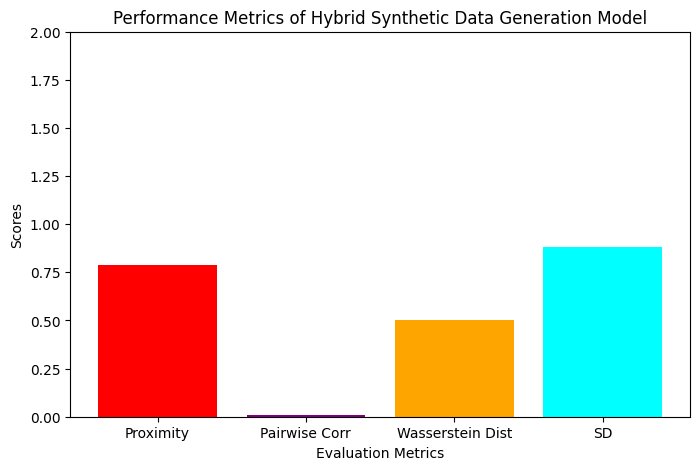

In [ ]:
# Re-import necessary libraries after execution state reset
import matplotlib.pyplot as plt
import numpy as np

# Generating sample data for visualization
metrics = ["Proximity", "Pairwise Corr", "Wasserstein Dist", "SD"]
values = [0.79, 0.01, 0.5, 0.88]

# Creating a bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['red', 'purple', 'orange', 'cyan'])

# Adding labels and title
plt.xlabel("Evaluation Metrics")
plt.ylabel("Scores")
plt.title("Performance Metrics of Hybrid Synthetic Data Generation Model")
plt.ylim(0, 2)

# Displaying the graph
plt.show()
